##  결정 트리 분석, 시각화 : 산점도, 선형 회귀 그래프를 이용할 예정.
### 결정 트리 시각화 (다른 프로그램을 설치해야함.)
### 샘플 데이터, 센서 데이터의 움직임을 수집한 데이터.
### UCI 대학의 연구원들이 몸에 센서를 달고, 몇일 간 생활을 해서,
### 움직임을 판단 -> 서있기, 앉기, 눕기, 계단 오르기 등.

## 용어 정리
### 결정 트리 : 머신러닝 알고리즘 중에 하나이고, 다중 분류를 하는데 사용을 많이 함. (비트리 구조와 비슷)
### 스스로 데이터 안에서 특정 규칙을 찾아서 학습하고, 트리 구조 분류 규칙을 만든다.
### 규칙 노드, 리프노드(결정노드)
### 예) 날개가 있나요? : 규칙노드
###               /        \
###  날 수 있니?  털이 있니? : 규칙노드
###      / (T)   \(F)     /(T)      \(F)
###   참새     펭귄  다람쥐 개구리 : 결정노드

### 정보이득지수 : 엔트로피(entropy) 개념을 기반으로함.
### 엔트로피 : 데이터 집합의 혼잡도를 의미.
### 예) 데이터에 다른 데이터가 섞여서 균일도가 떨어지면 -> 혼잡도가 높다 -> 엔트로피 높다.
### 정보이득지수 = 1 - 엔트로피
### 엔트로피 높다. -> 정보이득지수 낮다. -> 데이터가 순수하지 않다. -> 다른 데이터들이 섞여 있다.
### 엔트로피 낮다. -> 정보이득지수 높다. -> 데이터 균일도가 높다. -> 다른 데이터들이 많이 섞여 있지 않다..

### 지니계수 : 경제학 용어이고, 소득의 불균형의 정도를 나타낼 때 사용했고, 우리는 데이터의 순도 확인
### 지니계수 높다 -> 순도가 낮은 데이터의 집합 -> 균일도 낮다 -> 엔트로피 높다 -> 다른 데이터들이 섞여 있다

### 사이킷런에서 제공하는 결정 트리 분류 모델의 매개변수
### min_samples_split : 노드를 분할하기 위한 최소 샘플 데이터 갯수 (기본값 : 2)
### min_samples_leaf  : 리프노드가 되기 위한 최소 샘플 데이터 갯수
### max_features : 최적의 분할을 하기위한 고려해야할 최대 피처 갯수 (예, 독립변수)
### None : 모든 피쳐 사용, int : 사용할 피쳐의 갯수, float : 사용할 피처 갯수를 퍼센트로 나타낸 것
### sqrt : 루트 계산.

### max_depth : 트리의 최대 깊이

### 예) 날개가 있나요? : 규칙노드
###               /        \
###  날 수 있니?  털이 있니? : 규칙노드
###      / (T)   \(F)     /(T)      \(F)
###   참새     펭귄  다람쥐 개구리 : 결정노드

### -> max_depth : 2

### max_leaf_nodes : 리프노드(결정노드)에 들어가는 샘플의 최대 데이터 갯수.

### Graphviz 패키지 : 결정 트리를 시각화하는 도구.

### 샘플 데이터 소개 : README.txt 상세히 설명이 나옴.
### 요약 : 30명의 연구원이 데이터 수집에 참여했고, 삼성 갤럭시 s2를 착용하거, 6가지 움직임을 실행.
### 워킹, 계단 오르기, 계단 내리기, 눕기, 서있기, 앉기 등
### 움직임은 가속계, 자이로스코프를 이용해서, XYZ 3축에 대한 데이터를 수집.

In [57]:
# 샘플 데이터 받아서, 정리해보기.
import numpy as np
import pandas as pd
pd.__version__

'2.1.4'

In [58]:
# 피처 이름 읽기
# sep="\s+" -> 하나 이상의 공백을 의미
# header=None -> 처음 부터 실제값을 사용하겠다라는 의미. 
feature_name_df = pd.read_csv('./UCI HAR Dataset/features.txt', sep="\s+", header=None, names=["index","feature_name"], engine="python")
feature_name_df.head()

,index,feature_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


In [59]:
# 데이터 갯수 조회
feature_name_df.shape

(561, 2)

In [60]:
# 해당 피처 이름만 추출해보기.
feature_name = feature_name_df.iloc[:,1].values.tolist()
# head() 함수와 동일한 기능.
feature_name[:5]

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y']

In [61]:
# 샘플 데이터의 학습용 데이터, 평가용 데이터를 , 로드해서, 메모리상에 불러오기.
X_train = pd.read_csv("./UCI HAR Dataset/train/X_train.txt", sep="\s+", header=None, engine="python")
X_train.shape

(7352, 561)

In [62]:
# 샘플 데이터의 학습용 데이터, 평가용 데이터를 , 로드해서, 메모리상에 불러오기.
y_train = pd.read_csv("./UCI HAR Dataset/train/y_train.txt", sep="\s+", header=None, names=["action"], engine="python")
y_train.shape

(7352, 1)

In [63]:
# 샘플 데이터의 학습용 데이터, 평가용 데이터를 , 로드해서, 메모리상에 불러오기.
X_test = pd.read_csv("./UCI HAR Dataset/test/X_test.txt", sep="\s+", header=None, engine="python")
X_test.shape

(2947, 561)

In [64]:
# 샘플 데이터의 학습용 데이터, 평가용 데이터를 , 로드해서, 메모리상에 불러오기.
y_test = pd.read_csv("./UCI HAR Dataset/test/y_test.txt", sep="\s+", header=None, engine="python")
y_test.shape

(2947, 1)

In [65]:
# train, test 의 컬럼 달기. 
X_train.columns = feature_name
X_test.columns = feature_name

In [66]:
# X_train , 상위 5개 조회 
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [67]:
# y_train 값 조회 
# y_train_value_count= y_train["action"].value_counts()
# \n : 줄 넘기게 하는 것
print(f"y_train['action'].value_counts() : \n {y_train['action'].value_counts()}")

y_train['action'].value_counts() : 
 action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


In [68]:
# 움직임의 6가지 라벨링 불러오기. 
label_name_df = pd.read_csv("./UCI HAR Dataset/activity_labels.txt", sep="\s+", header=None ,
                            names=["index","label"], engine="python")
label_name_df.head()

,index,label
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING


In [69]:
# 인덱스 제거 
label_name = label_name_df.iloc[:,1].values.tolist()
label_name

['WALKING',
 'WALKING_UPSTAIRS',
 'WALKING_DOWNSTAIRS',
 'SITTING',
 'STANDING',
 'LAYING']

In [70]:
# 분석 모델 구축
from sklearn.tree import DecisionTreeClassifier

In [71]:
# 모델 불러오기
dt_HAR = DecisionTreeClassifier()


In [72]:
# 모델 훈련(학습 시키기)
dt_HAR.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
# 학습된 모델을 이용해서, 평가하기(예측값 구하기.)
Y_predict = dt_HAR.predict(X_test)

In [74]:
# 정확도 측정 해보기.
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, Y_predict)
print(f"accuracy 정확도 : {accuracy}")
print("accuracy 정확도 : {0:.4f}".format(accuracy))

accuracy 정확도 : 0.8649474041398032
accuracy 정확도 : 0.8649


In [75]:
# 결정 트리의 하이퍼 매개변수의 기본 정보 -> gini 정보 지수 확인용
# "criterion " : "gini", 분할 기준이 지니계수를 이용한다.
print("결정 트리의 하이퍼 매개변수의 기본 정보: ", dt_HAR.get_params())

결정 트리의 하이퍼 매개변수의 기본 정보:  {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [77]:
# 해당 정보를 이용해서, 기본 그래프 확인.
# 결정트리 시각화 툴 설치해서, 확인 해보기.
from sklearn.model_selection import GridSearchCV

# 규칙 노드와, 결정 노드 사이의 깊이를 임의로 정해서, 모델에게 넘겨주기
# 모델은 전달받은 깊이를 스스로 학습해서, 최적의 깊이를 찾기.
params = {
  "max_depth" : [6,8,10,12,16,20,24]
}
# scoring="accuracy" -> 정확도 기준
# cv=5 -> 교차 검증 분할수 5번, 4개의 훈련셋 , 1개의 검증 , 5번 반복
# return_train_score= True -> 훈련 데이터에 대한 성능 점수를 반환 받겠다. 
grid_cv = GridSearchCV(dt_HAR, param_grid=params, scoring="accuracy", cv=5, return_train_score= True)

# 교차 검증을 이용해서, 모델에 학습 시키기 
grid_cv.fit(X_train,y_train)

#


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [79]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

cv_results_df[["param_max_depth", "mean_test_score", "mean_train_score"]]
# 결과 분석
# 학습률이 높다해서 정답률이 높은게 아니다
# 다중분석 결정트리의 깊이가 깊다해서 정답률이 높은게 아니다 

,param_max_depth,mean_test_score,mean_train_score
0,6,0.844940,0.944913
1,8,0.852293,0.982692
2,10,0.844135,0.993403
3,12,0.840872,0.997212
4,16,0.844135,0.999660
5,20,0.842774,0.999966
6,24,0.846311,1.000000


In [81]:
print("최고의 평균 정확도 : {0:.4f}, 최적의 하이퍼 매개변수 : {1}".format(grid_cv.best_score_,grid_cv.best_params_))

최고의 평균 정확도 : 0.8523, 최적의 하이퍼 매개변수 : {'max_depth': 8}


In [95]:
# 2번째, 교차 검증을 해서, 조금 더 정확한 결과를 확인해보기.
params = {
  "max_depth" : [8,16,20],
  "min_samples_split" : [8,16,24]
}

# 모델 학습 시키기, 옵션 설정이 동일해서, 위의 코드 재사용. 
# scoring="accuracy" -> 정확도 기준
# cv=5 -> 교차 검증 분할수 5번, 4개의 훈련셋 , 1개의 검증 , 5번 반복
# return_train_score= True -> 훈련 데이터에 대한 성능 점수를 반환 받겠다. 
grid_cv = GridSearchCV(dt_HAR, param_grid=params, scoring="accuracy", cv=5, return_train_score= True)

# 교차 검증을 이용해서, 모델에 학습 시키기 
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 16, 20],
                         'min_samples_split': [8, 16, 24]},
             return_train_score=True, scoring='accuracy')

In [96]:
cv_results_df = pd.DataFrame(grid_cv.cv_results_)
# cv_results_df
cv_results_df[["param_max_depth", "param_min_samples_split", "mean_test_score", "mean_train_score"]]

,param_max_depth,param_min_samples_split,mean_test_score,mean_train_score
0,8,8,0.852838,0.981468
1,8,16,0.848892,0.979836
2,8,24,0.847941,0.978237
3,16,8,0.847263,0.994525
4,16,16,0.842096,0.990547
5,16,24,0.842501,0.986772
6,20,8,0.839374,0.994559
7,20,16,0.846176,0.990581
8,20,24,0.846718,0.986806


In [97]:
print("최고의 평균 정확도 : {0:.4f}, 최적의 하이퍼 매개변수 : {1}".format(grid_cv.best_score_,grid_cv.best_params_))

최고의 평균 정확도 : 0.8528, 최적의 하이퍼 매개변수 : {'max_depth': 8, 'min_samples_split': 8}


In [99]:
# 최적의 파라미터를 찾았고, 이 파라미터를 이용해서, 
# 최적의 모델을 구현해서, 다시 학습 후, 예측값을 구해서, 다시 평가 지표 점수를 확인. 
# 최적의 모델이라고 보면됨. 
best_dt_HAR = grid_cv.best_estimator_

# 최적을 모델을 이용해서, 학습시키기 -> 예측값을 조회. 
best_Y_predict = best_dt_HAR.predict(X_test)

# 채점, 확인하기. 정확도 얼마인지?
best_accuracy = accuracy_score(y_test, best_Y_predict)

print("베스트 결정 트리 예측 정확도 : {0:.4f}".format(best_accuracy))

베스트 결정 트리 예측 정확도 : 0.8751


In [100]:
# 간단한 막대 그래프로 시각화.
# 독립변수가 : 561개 있음. 그 중에서, 중요도가 높은 피처 10개를 찾아서, 그래프 그리기.

import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
# 561개의 피처 중에서, 중요도로 10개 뽑기.
feature_importances_values = best_dt_HAR.feature_importances_

# 데이터 타입을 시리즈 라는 타입으로 변환해서, 확인, 시리즈, 행, 열이 한개씩 표현되는 데이터 구조.
feature_importances_values_s = pd.Series(feature_importances_values, index=X_train.columns)

# 내림 차순 정렬을 해서, 상위 10개만 슬라이싱으로 가져오기.
feature_top10 = feature_importances_values_s.sort_values(ascending=False)[:10]

feature_top10

tGravityAcc-min()-X                0.253040
fBodyAccJerk-bandsEnergy()-1,24    0.213773
angle(Y,gravityMean)               0.138828
fBodyAccMag-energy()               0.115335
tGravityAcc-arCoeff()-Z,2          0.101422
fBodyGyro-maxInds-X                0.023941
tBodyGyro-correlation()-Y,Z        0.016493
tGravityAcc-energy()-Y             0.016413
tBodyAccMag-arCoeff()1             0.012596
fBodyAcc-max()-Y                   0.008814
dtype: float64

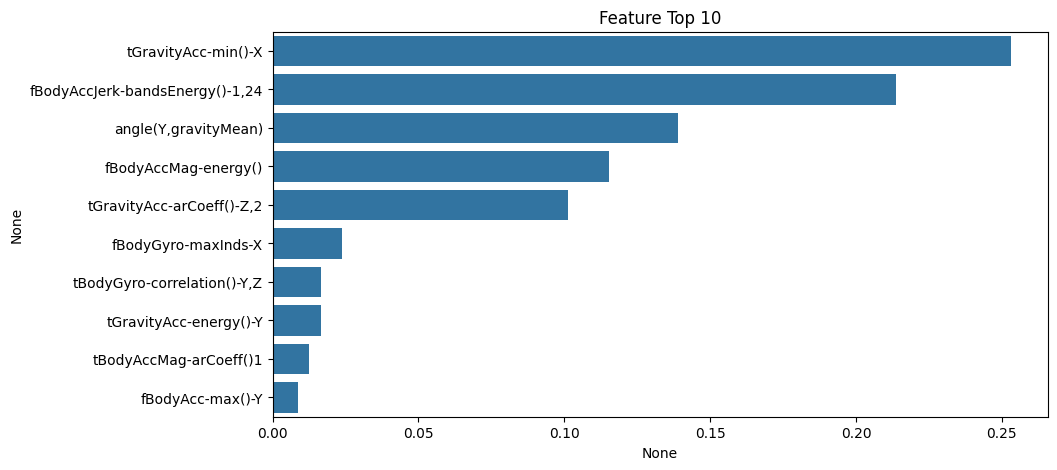

In [104]:
# 그림그리기 
plt.figure(figsize=(10,5))
plt.title("Feature Top 10")
sns.barplot(x=feature_top10, y = feature_top10.index)
plt.show()